In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Read csv file 
quarterly_income = "data/quarterly_inc.csv"
quarterly_expenditure = "data/quarterly_exp.csv"

# Read the data results

q_income_df = pd.read_csv(quarterly_income)
q_expend_df = pd.read_csv(quarterly_expenditure)

# Display the data table for preview
# q_income_df.head()
q_expend_df.columns

Index(['Quarter', 'Household final consumption expenditure',
       'Food and non-alcoholic beverages', 'Food', 'Non-alcoholic beverages',
       'Alcoholic beverages, tobacco and cannabis', 'Alcoholic beverages',
       'Tobacco', 'Cannabis products for non-medical use (licensed)',
       'Cannabis products for non-medical use (unlicensed)',
       ...
       'Jewellery, clocks and watches', 'Other personal effects',
       'Child care services outside the home',
       'Child care services in the home', 'Other social services',
       'Undertaking and other funeral services', 'Legal and other services',
       'Net expenditure abroad', 'Expenditure by Canadians abroad',
       'Expenditure by non-residents in Canada'],
      dtype='object', length=117)

In [2]:
#Rename columns of interest for readability
qincome_clean_df = q_income_df.rename(columns={"Compensation of employees 1  (x 1,000,000)": "Compensation of Employees",
                                             "Household disposable income 4  (x 1,000,000)": "Household Disposable Income" }) 
qincome_clean_df.columns

Index(['Quarter', 'Compensation of Employees',
       'Paid to residents by resident entities 1  (x 1,000,000)',
       'Paid to residents by non-resident entities 1  (x 1,000,000)',
       'Plus: net mixed income 1  (x 1,000,000)', 'Non-farm 1  (x 1,000,000)',
       'Farm 1  (x 1,000,000)', 'Rental income of households 1  (x 1,000,000)',
       'Plus: net property income 1  (x 1,000,000)',
       'Property income received 1  (x 1,000,000)',
       'Less: property income paid 1  (x 1,000,000)',
       'Equals: primary household income 1  (x 1,000,000)',
       'Primary household income 2  (x 1,000,000)',
       'Plus: current transfers received 2  (x 1,000,000)',
       'From non-profit institutions serving households 2  (x 1,000,000)',
       'From corporations 2  (x 1,000,000)',
       'From general governments 2 3  (x 1,000,000)',
       'Employment insurance benefits 2 3  (x 1,000,000)',
       'Social security benefits 2  (x 1,000,000)',
       'Other benefits 2 3  (x 1,000,000)'

In [3]:
# Merging the data frames
combined_df = pd.merge(q_expend_df, qincome_clean_df, how="left", on="Quarter")
combined_df.tail()


,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
46,Q32021,301564,27462,24162,3300,11344,5775,2940,1625,1004,...,0,172,0,212224,227004,230968,226672,4296,-3964,-14780
47,Q42021,302515,27286,24095,3191,11396,5832,2921,1671,972,...,0,212,0,172672,252668,253604,245600,8004,-936,-79996
48,Q12022,304266,27158,23903,3255,11183,5674,2907,1664,938,...,0,296,0,213616,267832,266680,254164,12516,1152,-54216
49,Q22022,311671,27113,23767,3346,11250,5696,2800,1852,902,...,0,336,0,161324,243428,239000,231196,7804,4428,-82104
50,Q32022,310707,26895,23658,3237,11161,5697,2668,1929,867,...,0,328,0,172788,223300,218688,221756,-3068,4612,-50512


## Q1 2010 - Q2 2022

In [23]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY, ),fontsize=15,color="blue")
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.grid()
    print(linregress(x_values, y_values))

The correlation between both factors is 0.87
The r-value is: 0.8729933235195588
y = 0.11x + 146959.94
LinregressResult(slope=0.1072962407630859, intercept=146959.93979068124, rvalue=0.8729933235195588, pvalue=6.790212776363239e-17, stderr=0.008563611059052048, intercept_stderr=10147.508980334795)


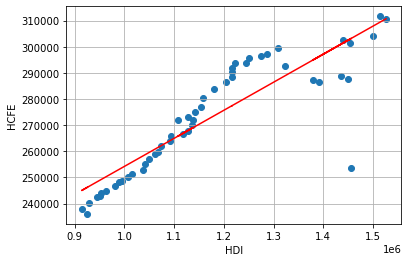

In [25]:
# HDI vs HFCE
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Household final consumption expenditure']

# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40

#label the y axis
y_label = "HCFE"
# x_label = "HDI"
#give the title
# plt.title(f'HDI vs HFCE')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
# plt.annotate(line_eq,(regEQplotX,regEQplotY, ),fontsize=15,color="red")

# #save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs HFCE.png")

The correlation between both factors is 0.95
The r-value is: 0.947766358959831
y = 0.01x + 12806.87
LinregressResult(slope=0.010315927467198789, intercept=12806.868139305912, rvalue=0.947766358959831, pvalue=5.759716482170171e-26, stderr=0.0004959667145033368, intercept_stderr=587.6991206939358)


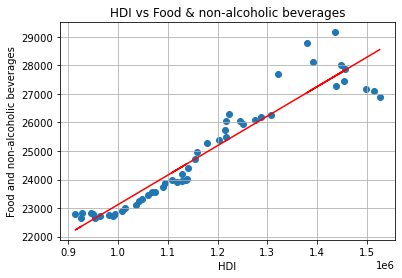

In [26]:

# HDI vs Food & non-alcoholic beverages
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Food and non-alcoholic beverages']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food and non-alcoholic beverages"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.9398788817648316
y = 0.01x + 11617.11
LinregressResult(slope=0.008928088269941145, intercept=11617.109716115381, rvalue=0.9398788817648316, pvalue=1.6484579703709392e-24, stderr=0.0004634355830741565, intercept_stderr=549.1511359662642)


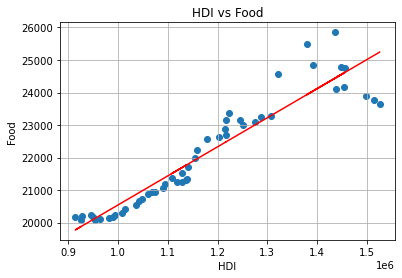

In [72]:
# HDI vs Food
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Food']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.6428105491346826
y = 0.01x + 5339.04
LinregressResult(slope=0.005075356960602937, intercept=5339.039818881929, rvalue=0.6428105491346826, pvalue=3.6565959745531994e-07, stderr=0.0008640295798013352, intercept_stderr=1023.8377081641416)


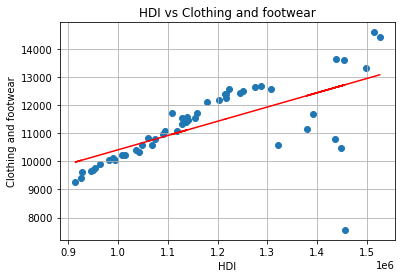

In [73]:
# HDI vs Clothing and footwear
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Clothing and footwear']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Clothing and footwear"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.9422377672154247
y = 0.0x + 1371.64
LinregressResult(slope=0.0024723602625568693, intercept=1371.6366637205879, rvalue=0.9422377672154247, pvalue=6.354510512330065e-25, stderr=0.0001255527965143881, intercept_stderr=148.7746373989259)


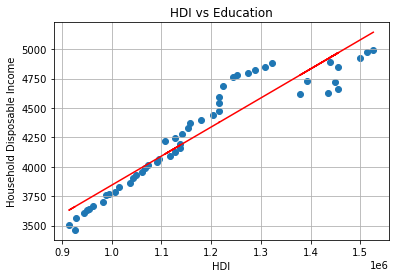

In [75]:
# HDI vs Education
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Education']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Education')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder
# 

The r-value is: 0.1976716707846052
y = 0.0x + 35136.0
LinregressResult(slope=0.004414039580765812, intercept=35135.9973410309, rvalue=0.1976716707846052, pvalue=0.16440000074682706, stderr=0.003127077912702135, intercept_stderr=3705.4521722830423)


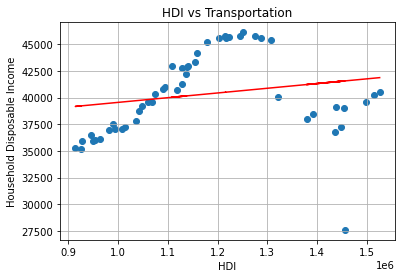

In [53]:
# HDI vs Transportation
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Transport']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.00869513256284106
y = 0.0x + 17426.1
LinregressResult(slope=9.693951643690733e-05, intercept=17426.104986719474, rvalue=0.00869513256284106, pvalue=0.951711743799656, stderr=0.0015926127322218192, intercept_stderr=1887.177253961531)


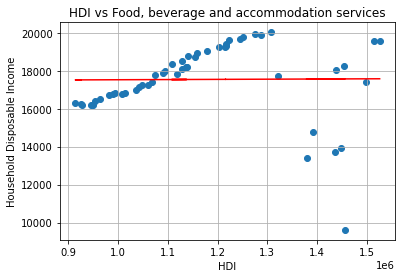

In [85]:
# HDI vs Food, beverage and accommodation services
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Food, beverage and accommodation services']

#label the y axis
y_label = "Household Disposable Income"
#give the title
plt.title(f'HDI vs Food, beverage and accommodation services')
x_label = "HDI"
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.1610649686184734
y = 0.0x + 2196.58
LinregressResult(slope=0.00030999535090017093, intercept=2196.5833847856998, rvalue=0.1610649686184734, pvalue=0.25885178155167393, stderr=0.0002713616517022897, intercept_stderr=321.5518288464029)


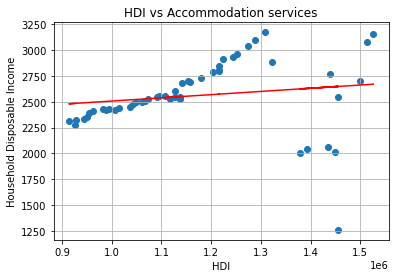

In [87]:
# HDI vs Accommodation services
x_values = combined_df['Household Disposable Income']
y_values = combined_df['Accommodation services']

#label the y axis
y_label = "Household Disposable Income"
#give the title
plt.title(f'HDI vs Accommodation services')
x_label = "HDI"
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

## Q1 2017 - Q3 2022

In [7]:
fullp_df = combined_df.iloc[28:51,]

fullp_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
28,Q12017,280224,24967,22232,2735,10118,5213,3375,..,1530,...,0,152,0,73284,180760,180160,165600,14560,600,-107476
29,Q22017,283993,25269,22556,2713,10139,5282,3339,..,1518,...,0,288,0,76620,173856,173300,164192,9108,556,-97236
30,Q32017,286533,25372,22626,2746,10129,5320,3301,..,1508,...,0,296,0,93700,177880,177472,166536,10936,408,-84180
31,Q42017,288474,25503,22694,2809,10203,5409,3291,..,1503,...,0,312,0,92968,188724,187944,171304,16640,780,-95756
32,Q12018,290484,25738,22892,2846,10272,5450,3292,0,1530,...,0,328,0,79488,194312,193568,172228,21340,744,-114824
33,Q22018,292029,26038,23148,2890,10189,5386,3249,0,1554,...,0,508,0,65856,190812,190812,171784,19028,0,-124956
34,Q32018,293819,26309,23359,2950,10296,5454,3228,0,1614,...,0,508,0,62948,184988,185152,171108,14044,-164,-122040
35,Q42018,293903,26062,23147,2915,10207,5352,3176,206,1473,...,0,516,0,77520,183544,184060,172816,11244,-516,-106024
36,Q12019,295558,25959,23009,2950,10251,5458,3131,204,1458,...,0,528,0,76508,185504,184840,169352,15488,664,-108996
37,Q22019,296306,26099,23102,2997,10257,5460,3127,301,1369,...,0,400,0,92268,182136,181692,172756,8936,444,-89868


The r-value is: 0.2801398583376236
y = 0.03x + 255772.54
LinregressResult(slope=0.027489455307752604, intercept=255772.5352294175, rvalue=0.2801398583376236, pvalue=0.19542747337673874, stderr=0.02055579870897333, intercept_stderr=27493.90686785051)


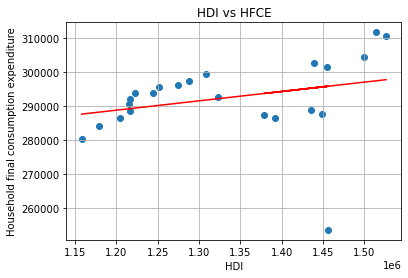

In [14]:
# HDI vs HFCE
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Household final consumption expenditure']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Household final consumption expenditure"
x_label = "HDI"
#give the title
plt.title(f'HDI vs HFCE')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs HFCE.png")

The r-value is: 0.7648244757540468
y = 0.01x + 16895.17
LinregressResult(slope=0.007397789537491479, intercept=16895.17386690837, rvalue=0.7648244757540468, pvalue=2.1355916241035975e-05, stderr=0.0013598072933980812, intercept_stderr=1818.7770571323133)


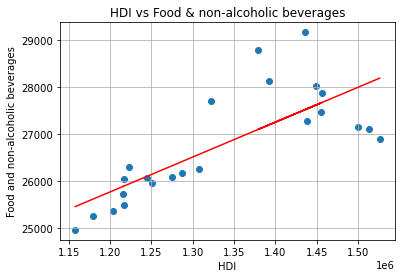

In [12]:
# HDI vs Food & non-alcoholic beverages
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food and non-alcoholic beverages']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food and non-alcoholic beverages"
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.7084103645266422
y = 0.01x + 16001.28
LinregressResult(slope=0.005779737286242544, intercept=16001.28112117231, rvalue=0.7084103645266422, pvalue=0.00015506811799580742, stderr=0.0012565960338041635, intercept_stderr=1680.7293558892586)


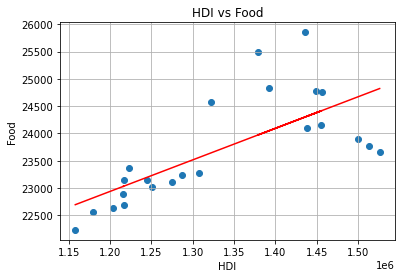

In [15]:
# HDI vs Food
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food"
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.07768895290300448
y = 0.0x + 10913.04
LinregressResult(slope=0.0009585333997838525, intercept=10913.043484421984, rvalue=0.07768895290300448, pvalue=0.7245842862139382, stderr=0.002684254906918, intercept_stderr=3590.2596374500226)


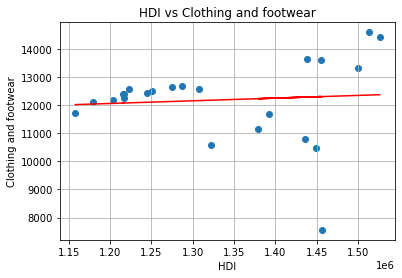

In [16]:
# HDI vs Clothing and footwear
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Clothing and footwear']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Clothing and footwear"
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.7062385057664411
y = 0.0x + 3274.0
LinregressResult(slope=0.0010799224633404032, intercept=3273.9973083087734, rvalue=0.7062385057664411, pvalue=0.00016584365715345838, stderr=0.0002362375003374827, intercept_stderr=315.9737028431406)


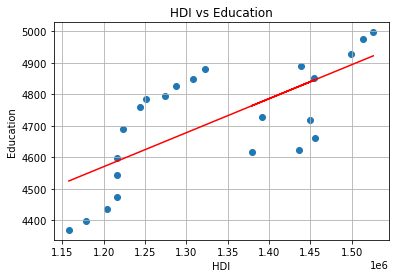

In [20]:
# HDI vs Education
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Education']

#label the y axis
y_label = "Education"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Education')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: -0.7494681458002532
y = -0.03x + 80639.52
LinregressResult(slope=-0.02909477229621369, intercept=80639.5162852509, rvalue=-0.7494681458002532, pvalue=3.852525378714213e-05, stderr=0.005608369673063791, intercept_stderr=7501.3379754677735)


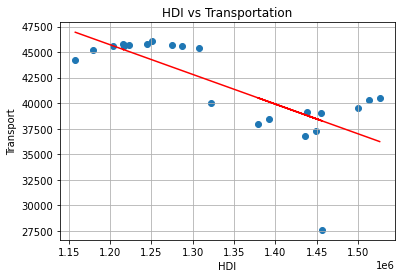

In [22]:
# HDI vs Transportation
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Transport']

#label the y axis
y_label = "Transport"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: -0.4775197994974712
y = -0.01x + 32657.12
LinregressResult(slope=-0.011126847460903363, intercept=32657.124994478836, rvalue=-0.4775197994974712, pvalue=0.02120544581200696, stderr=0.004467583484425022, intercept_stderr=5975.507251465175)


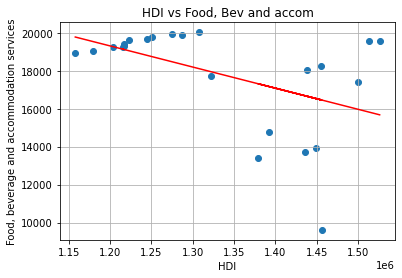

In [24]:
# HDI vs Food, Bev and accom
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Food, beverage and accommodation services']

#label the y axis
y_label = "Food, beverage and accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: -0.33868383051302836
y = -0.0x + 4464.59
LinregressResult(slope=-0.0013513269916962123, intercept=4464.585403925043, rvalue=-0.33868383051302836, pvalue=0.11391832185449213, stderr=0.0008192188199504536, intercept_stderr=1095.7261383512114)


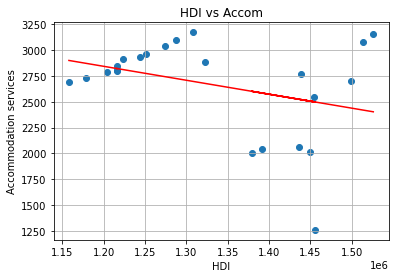

In [26]:
# HDI vs Accom
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Accommodation services']

#label the y axis
y_label = "Accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.25305157753167346
y = 0.0x + 10611.97
LinregressResult(slope=0.0014782649270708712, intercept=10611.97496418825, rvalue=0.25305157753167346, pvalue=0.24401986757665434, stderr=0.0012332847394935997, intercept_stderr=1649.5499031315358)


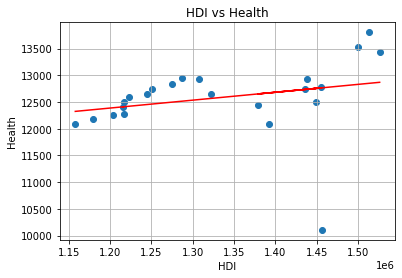

In [35]:
# HDI vs Health
x_values = fullp_df['Household Disposable Income']
y_values = fullp_df['Health']

#label the y axis
y_label = "Health"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

## Before COVID19        (Q1 2017 - Q4 2019)

In [18]:
before_df = combined_df.iloc[28:40,]

before_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
28,Q12017,280224,24967,22232,2735,10118,5213,3375,..,1530,...,0,152,0,73284,180760,180160,165600,14560,600,-107476
29,Q22017,283993,25269,22556,2713,10139,5282,3339,..,1518,...,0,288,0,76620,173856,173300,164192,9108,556,-97236
30,Q32017,286533,25372,22626,2746,10129,5320,3301,..,1508,...,0,296,0,93700,177880,177472,166536,10936,408,-84180
31,Q42017,288474,25503,22694,2809,10203,5409,3291,..,1503,...,0,312,0,92968,188724,187944,171304,16640,780,-95756
32,Q12018,290484,25738,22892,2846,10272,5450,3292,0,1530,...,0,328,0,79488,194312,193568,172228,21340,744,-114824
33,Q22018,292029,26038,23148,2890,10189,5386,3249,0,1554,...,0,508,0,65856,190812,190812,171784,19028,0,-124956
34,Q32018,293819,26309,23359,2950,10296,5454,3228,0,1614,...,0,508,0,62948,184988,185152,171108,14044,-164,-122040
35,Q42018,293903,26062,23147,2915,10207,5352,3176,206,1473,...,0,516,0,77520,183544,184060,172816,11244,-516,-106024
36,Q12019,295558,25959,23009,2950,10251,5458,3131,204,1458,...,0,528,0,76508,185504,184840,169352,15488,664,-108996
37,Q22019,296306,26099,23102,2997,10257,5460,3127,301,1369,...,0,400,0,92268,182136,181692,172756,8936,444,-89868


The r-value is: 0.9514159395860565
y = 0.13x + 137193.09
LinregressResult(slope=0.12530133977856747, intercept=137193.0936303783, rvalue=0.9514159395860565, pvalue=1.9643747246461354e-06, stderr=0.01282351604975234, intercept_stderr=15801.942516903759)


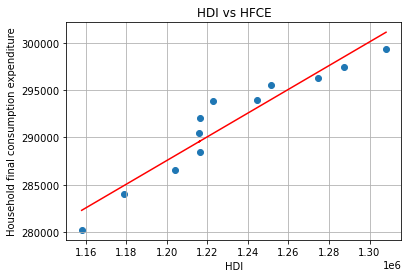

In [77]:
# HDI vs HFCE
x_values = before_df['Household Disposable Income']
y_values = before_df['Household final consumption expenditure']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Household final consumption expenditure"
x_label = "HDI"
#give the title
plt.title(f'HDI vs HFCE')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
plt.savefig("data/HDI vs HFCE.png")

The r-value is: 0.8260462000500982
y = 0.01x + 15671.29
LinregressResult(slope=0.008234316654684702, intercept=15671.28555823971, rvalue=0.8260462000500982, pvalue=0.0009293324027416452, stderr=0.0017766262188197524, intercept_stderr=2189.270499205715)


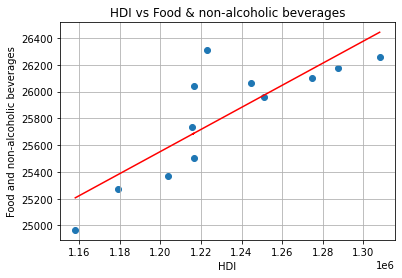

In [78]:
# HDI vs Food & non-alcoholic beverages
x_values = before_df['Household Disposable Income']
y_values = before_df['Food and non-alcoholic beverages']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food and non-alcoholic beverages"
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.7943503528782477
y = 0.01x + 15258.43
LinregressResult(slope=0.006236914213288499, intercept=15258.434537538762, rvalue=0.7943503528782477, pvalue=0.0020273605703760716, stderr=0.0015082567729839914, intercept_stderr=1858.5687993024414)


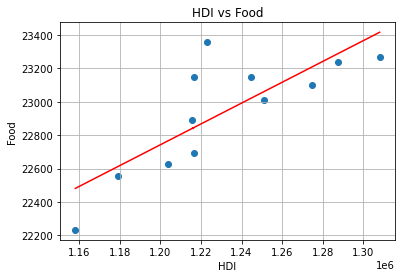

In [79]:
# HDI vs Food
x_values = before_df['Household Disposable Income']
y_values = before_df['Food']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food"
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.8710322521530908
y = 0.01x + 5687.44
LinregressResult(slope=0.005430876227467389, intercept=5687.443146272099, rvalue=0.8710322521530908, pvalue=0.0002253960202780047, stderr=0.0009685384440220816, intercept_stderr=1193.4939495898961)


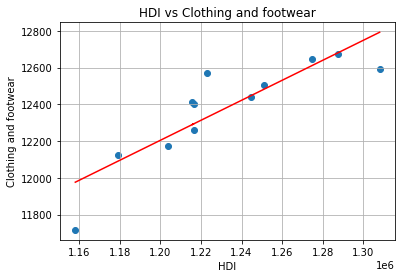

In [80]:
# HDI vs Clothing and footwear
x_values = before_df['Household Disposable Income']
y_values = before_df['Clothing and footwear']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Clothing and footwear"
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.9306493624331337
y = 0.0x + -31.95
LinregressResult(slope=0.0037829359549822437, intercept=-31.954325755760692, rvalue=0.9306493624331337, pvalue=1.1236519891455716e-05, stderr=0.0004703485793449204, intercept_stderr=579.5930838998966)


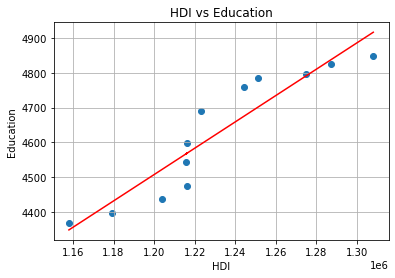

In [19]:
# HDI vs Education
x_values = before_df['Household Disposable Income']
y_values = before_df['Education']

#label the y axis
y_label = "Education"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Education')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.5309836167137794
y = 0.01x + 38380.7
LinregressResult(slope=0.005819336116877125, intercept=38380.70242459609, rvalue=0.5309836167137794, pvalue=0.07567912916473944, stderr=0.0029367812531292327, intercept_stderr=3618.8864556819403)


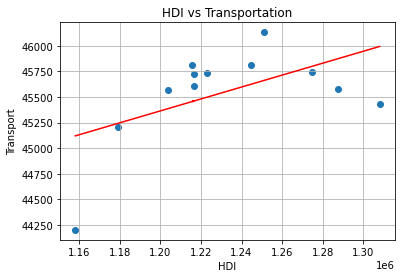

In [21]:
# HDI vs Transportati
x_values = before_df['Household Disposable Income']
y_values = before_df['Transport']

#label the y axis
y_label = "Transport"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.9668150338448869
y = 0.01x + 9756.28
LinregressResult(slope=0.007918184920773948, intercept=9756.283945672432, rvalue=0.9668150338448869, pvalue=2.9976742054064456e-07, stderr=0.0006616597159753497, intercept_stderr=815.3386915903826)


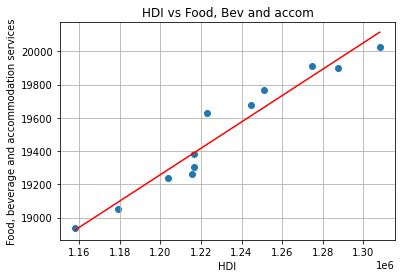

In [23]:
# HDI vs Food, Bev and accom
x_values = before_df['Household Disposable Income']
y_values = before_df['Food, beverage and accommodation services']

#label the y axis
y_label = "Food, beverage and accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.9835545128052022
y = 0.0x + -1221.97
LinregressResult(slope=0.003345284982639051, intercept=-1221.9657084174737, rvalue=0.9835545128052022, pvalue=9.216015955981193e-09, stderr=0.00019425854329433335, intercept_stderr=239.37758744519994)


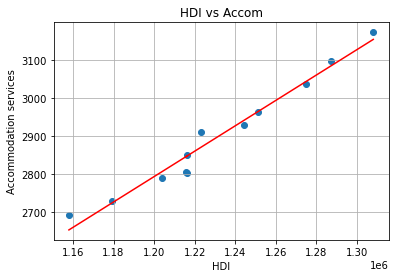

In [25]:
# HDI vs Accom
x_values = before_df['Household Disposable Income']
y_values = before_df['Accommodation services']

#label the y axis
y_label = "Accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.9591773489466867
y = 0.01x + 4597.56
LinregressResult(slope=0.006443803253001977, intercept=4597.557214235335, rvalue=0.9591773489466867, pvalue=8.336357316641609e-07, stderr=0.0006008012607057701, intercept_stderr=740.3450776621629)


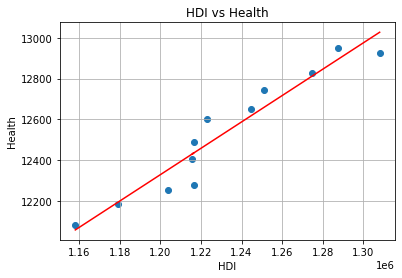

In [33]:
# HDI vs Health
x_values = before_df['Household Disposable Income']
y_values = before_df['Health']

#label the y axis
y_label = "Health"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

## COVID-19 (Q1 2020- Q3 2022)

In [31]:
covid_df = combined_df.iloc[40:51,]

covid_df

,Quarter,Household final consumption expenditure,Food and non-alcoholic beverages,Food,Non-alcoholic beverages,"Alcoholic beverages, tobacco and cannabis",Alcoholic beverages,Tobacco,Cannabis products for non-medical use (licensed),Cannabis products for non-medical use (unlicensed),...,"From corporations 5 (x 1,000,000)","From general governments 3 5 (x 1,000,000)","From non-residents 5 (x 1,000,000)","Equals: gross saving and capital transfers 5 (x 1,000,000)","Less: non-financial capital acquisitions 5 (x 1,000,000)","Fixed capital 5 (x 1,000,000)","New assets 5 (x 1,000,000)","Existing assets 5 (x 1,000,000)","Inventories 5 (x 1,000,000)","Equals: net lending or net borrowing 5 (x 1,000,000)"
40,Q12020,292702,27696,24577,3119,10702,5805,3137,656,1104,...,0,420,0,140544,194544,193804,178980,14824,740,-54000
41,Q22020,253559,27869,24762,3107,10782,5771,3175,765,1071,...,0,184,0,453184,162236,163076,153296,9780,-840,290948
42,Q32020,286409,28121,24836,3285,11008,5793,3150,1023,1042,...,0,172,0,249360,208012,210696,204768,5928,-2684,41348
43,Q42020,287279,28775,25493,3282,11098,5762,3074,1205,1057,...,0,144,0,221356,224312,225044,212804,12240,-732,-2956
44,Q12021,288913,29159,25853,3306,11260,5913,3052,1243,1052,...,0,140,0,271580,248780,251408,234880,16528,-2628,22800
45,Q22021,287525,28019,24774,3245,11206,5825,2986,1360,1035,...,0,164,0,278036,246160,247596,239468,8128,-1436,31876
46,Q32021,301564,27462,24162,3300,11344,5775,2940,1625,1004,...,0,172,0,212224,227004,230968,226672,4296,-3964,-14780
47,Q42021,302515,27286,24095,3191,11396,5832,2921,1671,972,...,0,212,0,172672,252668,253604,245600,8004,-936,-79996
48,Q12022,304266,27158,23903,3255,11183,5674,2907,1664,938,...,0,296,0,213616,267832,266680,254164,12516,1152,-54216
49,Q22022,311671,27113,23767,3346,11250,5696,2800,1852,902,...,0,336,0,161324,243428,239000,231196,7804,4428,-82104


The r-value is: 0.3768773167453953
y = 0.1x + 148021.17
LinregressResult(slope=0.10076625830943828, intercept=148021.16684978004, rvalue=0.3768773167453953, pvalue=0.2532376591166154, stderr=0.08255212967897878, intercept_stderr=119174.76759357928)


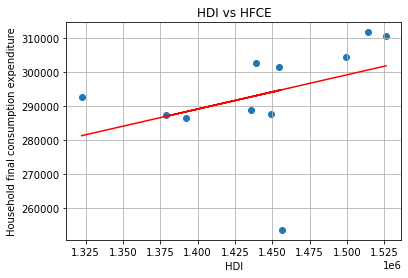

In [88]:
# HDI vs HFCE
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Household final consumption expenditure']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Household final consumption expenditure"
x_label = "HDI"
#give the title
plt.title(f'HDI vs HFCE')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs HFCE.png")

The r-value is: -0.5473175247285896
y = -0.01x + 37018.35
LinregressResult(slope=-0.006406232790821106, intercept=37018.35455124756, rvalue=-0.5473175247285896, pvalue=0.0813971062823559, stderr=0.0032653419693102516, intercept_stderr=4713.947075858452)


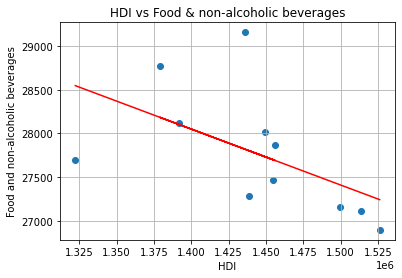

In [89]:
# HDI vs Food & non-alcoholic beverages
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food and non-alcoholic beverages']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food and non-alcoholic beverages"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food & non-alcoholic beverages')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: -0.5910189857920323
y = -0.01x + 34420.58
LinregressResult(slope=-0.0068535389560864775, intercept=34420.58100741345, rvalue=-0.5910189857920323, pvalue=0.05551872213712042, stderr=0.003118038357743737, intercept_stderr=4501.295097739898)


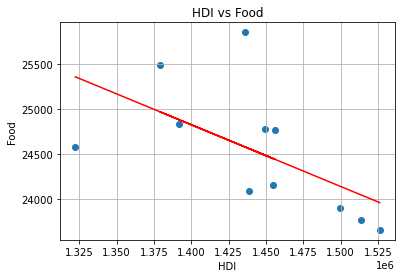

In [90]:
# HDI vs Food
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Food"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.50384789080686
y = 0.02x + -13710.82
LinregressResult(slope=0.017815632171676473, intercept=-13710.816818803538, rvalue=0.50384789080686, pvalue=0.11406303999676101, stderr=0.010180987738489026, intercept_stderr=14697.583845816533)


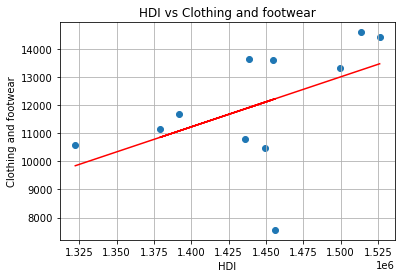

In [91]:
# HDI vs Clothing and footwear
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Clothing and footwear']

# tweak where the equation appears on the plot
# regEQplotX = 0
# regEQplotY = 40

#label the y axis
y_label = "Clothing and footwear"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Clothing and footwear')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the neighboring output_data folder
# plt.savefig("data/HDI vs food and.png")

The r-value is: 0.4773298396671004
y = 0.0x + 3209.03
LinregressResult(slope=0.0011076125754524951, intercept=3209.0275485573707, rvalue=0.4773298396671004, pvalue=0.13762027455010697, stderr=0.0006796739530523061, intercept_stderr=981.1980103893537)


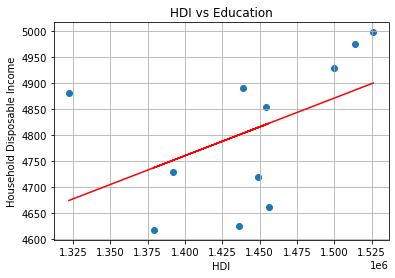

In [92]:
# HDI vs Education
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Education']

#label the y axis
y_label = "Household Disposable Income"
#give the title
plt.title(f'HDI vs Education')
x_label = "HDI"
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.02954483749082457
y = 0.0x + 35324.02
LinregressResult(slope=0.0017610424160462515, intercept=35324.01899169272, rvalue=0.02954483749082457, pvalue=0.931283435103109, stderr=0.0198599122897934, intercept_stderr=28670.373989972108)


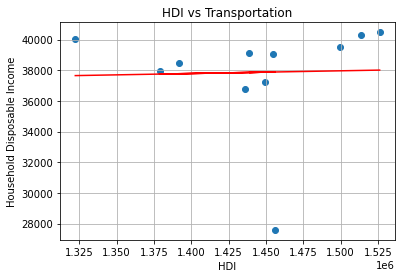

In [93]:
# HDI vs Transportation
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Transport']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Transportation')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.31107336782721556
y = 0.02x + -7171.74
LinregressResult(slope=0.016065680750436746, intercept=-7171.7433468328145, rvalue=0.31107336782721556, pvalue=0.3517883155836331, stderr=0.01636119540271647, intercept_stderr=23619.51977803892)


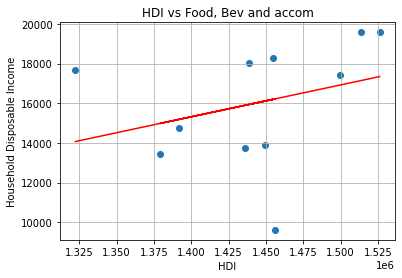

In [95]:
# HDI vs Food, Bev and accom
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Food, beverage and accommodation services']

#label the y axis
y_label = "Household Disposable Income"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Food, Bev and accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.2785735480338017
y = 0.0x + -1436.92
LinregressResult(slope=0.0026661365935011453, intercept=-1436.9173238874773, rvalue=0.2785735480338017, pvalue=0.4068190968453118, stderr=0.0030639392785133633, intercept_stderr=4423.196019988931)


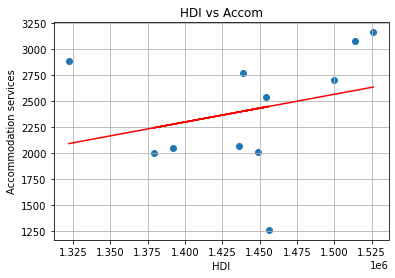

In [96]:
# HDI vs Accom
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Accommodation services']

#label the y axis
y_label = "Accommodation services"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Accom')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder

The r-value is: 0.34344662859608704
y = 0.01x + 4598.98
LinregressResult(slope=0.005570504669922331, intercept=4598.977740678585, rvalue=0.34344662859608704, pvalue=0.30109386860380105, stderr=0.005077609024512506, intercept_stderr=7330.190968791303)


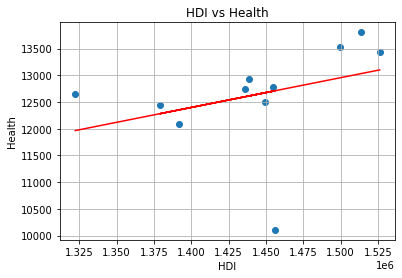

In [34]:
# HDI vs Health
x_values = covid_df['Household Disposable Income']
y_values = covid_df['Health']

#label the y axis
y_label = "Health"
x_label = "HDI"
#give the title
plt.title(f'HDI vs Health')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

# #save as a png to the data folder